<a href="https://colab.research.google.com/github/ayman86/Photo_Quality_Classification/blob/main/InceptionResNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# ./input/
PATH = os.path.abspath(os.path.join('.', 'databaserelease2'))

# ./input/sample/images/
SOURCE_IMAGES = '/content/drive/MyDrive/Datasets - Copy/First Dataset'#os.path.join(PATH, "sample", "images")
x2,y2,image_classes = (SOURCE_IMAGES)


['bad_lighting', 'fastfading', 'gblur', 'jp2k', 'jpeg', 'refimgs']
Adding Images: Processing  bad_lighting
Processing  fastfading
Processing  gblur
Processing  jp2k
Processing  jpeg
Processing  refimgs



In [ ]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_valtest, y_train, y_valtest = train_test_split(x2,y2, test_size=0.20, random_state=1, stratify=y2)

# Second split the 40% into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=1, stratify=y_valtest)

print(np.array(X_train).shape)
print(np.array(X_val).shape)
print(np.array(X_test).shape)

(962, 256, 256, 3)
(121, 256, 256, 3)
(120, 256, 256, 3)


In [ ]:
num_classes=6

K.image_data_format()

img_width, img_height = 256, 256
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
epochs = 100
batch_size = 16

In [ ]:
input_shape = (256,256,3)

model=Sequential()
model.add(InceptionResNetV2(include_top=False,pooling='avg',weights='imagenet'))
model.add(Dense(num_classes,activation='softmax'))

model.summary()



219070464/219055592 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 9222      
                                                                 
Total params: 54,345,958
Trainable params: 54,285,414
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
model.compile(
	loss='binary_crossentropy',
	optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
	metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255, 
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode='reflect')
valtest_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
validation_generator = valtest_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
test_generator = valtest_datagen.flow(np.array(X_test), y_test, batch_size=batch_size)

history = model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_val), np.array(y_val)), epochs=50)


Epoch 1/50
31/31 [==============================] - 60s 877ms/step - loss: 0.3747 - acc: 0.4407 - val_loss: 9.5652 - val_acc: 0.0165
Epoch 2/50
31/31 [==============================] - 22s 700ms/step - loss: 0.2700 - acc: 0.5800 - val_loss: 54.4409 - val_acc: 0.0165
Epoch 3/50
31/31 [==============================] - 22s 717ms/step - loss: 0.2391 - acc: 0.6164 - val_loss: 0.7302 - val_acc: 0.3140
Epoch 4/50
31/31 [==============================] - 23s 735ms/step - loss: 0.2282 - acc: 0.6518 - val_loss: 1.6382 - val_acc: 0.4132
Epoch 5/50
31/31 [==============================] - 23s 754ms/step - loss: 0.2118 - acc: 0.6788 - val_loss: 0.8168 - val_acc: 0.3306
Epoch 6/50
31/31 [==============================] - 23s 745ms/step - loss: 0.2154 - acc: 0.6757 - val_loss: 1.7426 - val_acc: 0.2893
Epoch 7/50
31/31 [==============================] - 23s 753ms/step - loss: 0.2052 - acc: 0.7017 - val_loss: 4.2622 - val_acc: 0.3719
Epoch 8/50
31/31 [==============================] - 24s 760ms/step -

In [ ]:
model.save_weights('/content/drive/MyDrive/Datasets - Copy/8020weights.h5')


In [ ]:
model.load_weights('/content/drive/MyDrive/Datasets - Copy/8020weights.h5')


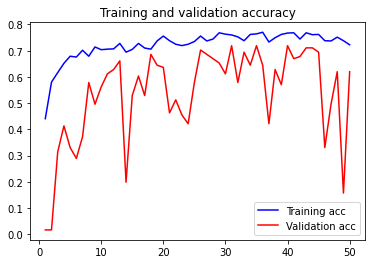

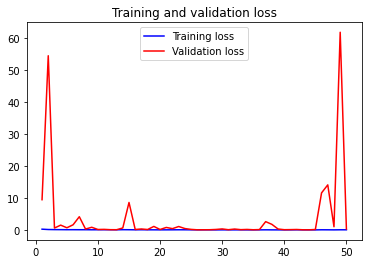

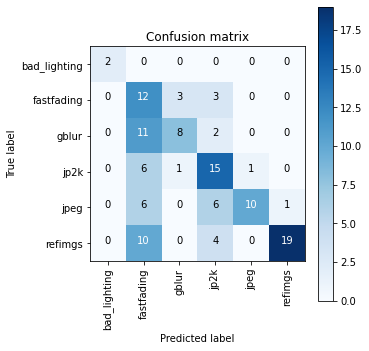

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/Datasets - Copy/trvlAcc.png")
plt.show()

plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/Datasets - Copy/trvlLoss.png")
plt.show()

import sklearn
import itertools
from sklearn.metrics import confusion_matrix
dict_characters = {0: 'Clear', 1: 'Blurry'}
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("/content/drive/MyDrive/Datasets - Copy/cm-"+title+".png")
    plt.show()

    
a=np.array(X_test)
b=np.array(y_test)
Y_pred = model.predict(a)


Y_pred_classes = np.argmax(Y_pred,axis=1)
confusion_mtx = confusion_matrix(np.argmax(b,axis=1), Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(image_classes))

In [ ]:
sklearn.metrics.accuracy_score(Y_pred_classes,np.argmax(b,axis=1))


0.55

In [ ]:
confusion_mtx


array([[ 2,  0,  0,  0,  0,  0],
       [ 0, 12,  3,  3,  0,  0],
       [ 0, 11,  8,  2,  0,  0],
       [ 0,  6,  1, 15,  1,  0],
       [ 0,  6,  0,  6, 10,  1],
       [ 0, 10,  0,  4,  0, 19]])

In [ ]:
class_totals = [sum(i) for i in confusion_mtx]
class_totals

[2, 18, 21, 23, 23, 33]

In [ ]:
class_correct_pred = [confusion_mtx[i][i] for i in range(6)]
class_correct_pred

[2, 12, 8, 15, 10, 19]

In [ ]:
accuracies = [class_correct_pred[i]/class_totals[i] for i in range(6)]
accuracies

[1.0,
 0.6666666666666666,
 0.38095238095238093,
 0.6521739130434783,
 0.43478260869565216,
 0.5757575757575758]

In [ ]:
class_totals = [sum(i) for i in confusion_mtx]
class_totals

tp = [confusion_mtx[i][i] for i in range(6)]
tp

sensetivity = [tp[i]/class_totals[i] for i in range(6)]
sensetivity

[1.0,
 0.6666666666666666,
 0.38095238095238093,
 0.6521739130434783,
 0.43478260869565216,
 0.5757575757575758]

In [ ]:
fp = [[sum(x) for x in zip(*confusion_mtx)][i] - tp[i] for i in range(6)]
fp

[0, 33, 4, 15, 1, 1]

In [ ]:
sumall = sum(map(sum, confusion_mtx))
print(sumall)
tn = [sumall - [sum(x) for x in zip(*confusion_mtx)][i] for i in range(6)]
tn
specificity = [tn[i]/(tn[i]+fp[i]) for i in range(6)]
specificity

120


[1.0,
 0.6944444444444444,
 0.9642857142857143,
 0.8571428571428571,
 0.990909090909091,
 0.9900990099009901]

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255, 
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode='reflect')
valtest_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
validation_generator = valtest_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
test_generator = valtest_datagen.flow(np.array(X_test), y_test, batch_size=batch_size)

history = model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_val), np.array(y_val)), epochs=250)


Epoch 1/250
31/31 [==============================] - 23s 753ms/step - loss: 0.1630 - acc: 0.7516 - val_loss: 0.2480 - val_acc: 0.6198
Epoch 2/250
31/31 [==============================] - 24s 770ms/step - loss: 0.1556 - acc: 0.7723 - val_loss: 0.2405 - val_acc: 0.6198
Epoch 3/250
31/31 [==============================] - 23s 738ms/step - loss: 0.1563 - acc: 0.7536 - val_loss: 0.2098 - val_acc: 0.6860
Epoch 4/250
31/31 [==============================] - 23s 735ms/step - loss: 0.1543 - acc: 0.7578 - val_loss: 0.2360 - val_acc: 0.7025
Epoch 5/250
31/31 [==============================] - 23s 743ms/step - loss: 0.1692 - acc: 0.7474 - val_loss: 0.3028 - val_acc: 0.5620
Epoch 6/250
31/31 [==============================] - 23s 757ms/step - loss: 0.1541 - acc: 0.7599 - val_loss: 0.2372 - val_acc: 0.6364
Epoch 7/250
31/31 [==============================] - 23s 739ms/step - loss: 0.1879 - acc: 0.7089 - val_loss: 1.5320 - val_acc: 0.2893
Epoch 8/250
31/31 [==============================] - 23s 738ms

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/Datasets - Copy/trvlAcc1.png")
plt.show()

plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/Datasets - Copy/trvlLoss1.png")
plt.show()

import sklearn
import itertools
from sklearn.metrics import confusion_matrix
dict_characters = {0: 'Clear', 1: 'Blurry'}
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("/content/drive/MyDrive/Datasets - Copy/cm-"+title+".png")
    plt.show()

    
a=np.array(X_test)
b=np.array(y_test)
Y_pred = model.predict(a)


Y_pred_classes = np.argmax(Y_pred,axis=1)
confusion_mtx = confusion_matrix(np.argmax(b,axis=1), Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(image_classes))

In [ ]:
sklearn.metrics.accuracy_score(Y_pred_classes,np.argmax(b,axis=1))


In [ ]:
confusion_mtx


In [ ]:
accuracies = [class_correct_pred[i]/class_totals[i] for i in range(6)]
accuracies

In [ ]:
sumall = sum(map(sum, confusion_mtx))
print(sumall)
tn = [sumall - [sum(x) for x in zip(*confusion_mtx)][i] for i in range(6)]
tn
specificity = [tn[i]/(tn[i]+fp[i]) for i in range(6)]
specificity